In [5]:
from planet4.io import get_image_id, get_image_name, get_list_of_image_names

In [2]:
from planet4.region_data import Inca

In [6]:
data = get_list_of_image_names(Inca.season1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498871 entries, 9496514 to 12845064
Data columns (total 23 columns):
classification_id    498871 non-null object
created_at           498871 non-null datetime64[ns]
image_id             498871 non-null object
image_name           498871 non-null object
image_url            498871 non-null object
user_name            498871 non-null object
marking              498871 non-null object
x_tile               498871 non-null int64
y_tile               498871 non-null int64
acquisition_date     498871 non-null datetime64[ns]
local_mars_time      498871 non-null object
x                    422145 non-null float64
y                    422145 non-null float64
image_x              422145 non-null float64
image_y              422145 non-null float64
radius_1             226544 non-null float64
radius_2             226544 non-null float64
distance             132975 non-null float64
angle                359519 non-null float64
spread               48

In [9]:
image_ids = data.image_id.unique()

In [10]:
df = data[data.image_id==image_ids[0]]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 9496514 to 11533480
Data columns (total 23 columns):
classification_id    87 non-null object
created_at           87 non-null datetime64[ns]
image_id             87 non-null object
image_name           87 non-null object
image_url            87 non-null object
user_name            87 non-null object
marking              87 non-null object
x_tile               87 non-null int64
y_tile               87 non-null int64
acquisition_date     87 non-null datetime64[ns]
local_mars_time      87 non-null object
x                    70 non-null float64
y                    70 non-null float64
image_x              70 non-null float64
image_y              70 non-null float64
radius_1             58 non-null float64
radius_2             58 non-null float64
distance             0 non-null float64
angle                58 non-null float64
spread               87 non-null float64
version              87 non-null float64
hirise_x             7

In [13]:
df.groupby(['classification_id','user_name']).size()

classification_id         user_name                                     
5147b77ca202b4039700068c  not-logged-in-1aba962442d2759bc2b1a0efa97b7c60    1
5147ca3fa202b40397000ca3  VanessaEsparza                                    6
514ca6cd7c1d5e04d300dcce  7bluebird7                                        8
515f203fc237d93b3a0013a2  Pandabeara78                                      1
51621dfd79807c3b9600938c  Dwelling                                          1
518d60dc2887f31f4c03b33a  Hooloovoo                                         1
519bb053a507e8043d000ca4  Higginsj                                          2
51eef91c12af046299007e35  merxator                                          4
51f50c24be70a605140211da  Wiblet                                            1
52559b9472c10938eb0017fb  not-logged-in-c040503abf6d2f63105f4fd3e730d254    1
525959677498327ba6005868  not-logged-in-e2f11c59134f6da6e95d796422ae2a12    1
5269058272c1096b9b019558  not-logged-in-353e5e708a8b9153ce0037f02f3f4

In [77]:
def process_image_name(image_name):

    def process_user_group(g):
        c_id = g.sort('created_at').classification_id.iloc[0]
        return g[g.classification_id == c_id]

    data = df[df.image_name == image_name]
    data = data.groupby(['user_name']).apply(
        process_user_group).reset_index(drop=True)
    fname = 'temp_' + image_name + '.h5'
    data.to_hdf(fname, 'df')

def process_group(g):
    user_data.sort_index(inplace=True)
    return user_data.f

In [165]:
def process_user_group(g):
    c_id = g.sort('created_at').classification_id.iloc[0]
    return g[g.classification_id == c_id]

In [139]:
filtered_data = df.groupby(['user_name']).apply(process_user_group)

In [16]:
from planet4 import helper_functions as hf

In [80]:
def process_image_id(image_id):
    df = data[data.image_id==image_id]
    n_class = df.classification_id.unique().size
    results = hf.classification_counts_per_user(df).value_counts()
    if not any(results.index>1):
        return n_class, n_class
    else:
        n_class_real = results[1]
        for index in results.index[results.index>1]:
            n_class_real += results[index]
        return (n_class_real, n_class)

In [81]:
real_class_percents = []
for image_id in image_ids:
    real_class_percents.append(process_image_id(image_id))

In [92]:
%matplotlib inline
import matplotlib.pyplot as plt

In [83]:
s = pd.DataFrame(real_class_percents, index=image_ids, columns=['real_n_class', 'expected_n_class'])

In [84]:
s.head()

,real_n_class,expected_n_class
APF0000zby,30,30
APF0000zb5,30,30
APF0000zbr,30,30
APF0000zb7,30,30
APF0000zc1,29,30


In [88]:
s.plot()

In [99]:
import seaborn as sns
sns.set_context('talk')

In [94]:
s.head()

,real_n_class,expected_n_class
APF0000zby,30,30
APF0000zb5,30,30
APF0000zbr,30,30
APF0000zb7,30,30
APF0000zc1,29,30


In [96]:
s = s.assign(fraction=s.real_n_class/s.expected_n_class)

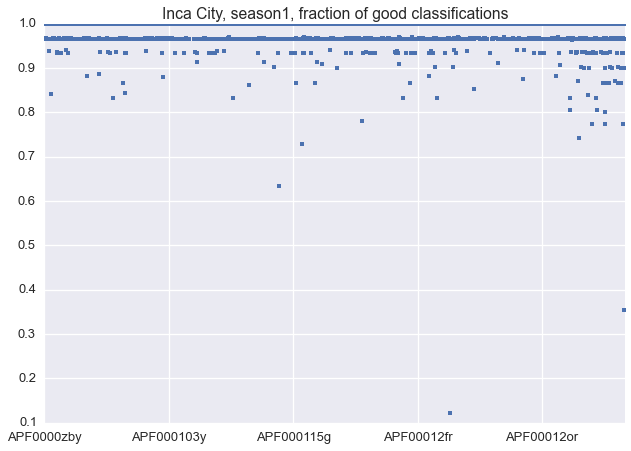

In [102]:
s.fraction.plot(style='.',title='Inca City, season1, fraction of good classifications')

In [101]:
s.describe()

,real_n_class,expected_n_class,fraction
count,4666.000000,4666.000000,4666.000000
mean,29.936348,30.202315,0.991828
std,0.879454,1.397672,0.026835
min,11.000000,13.000000,0.121739
25%,30.000000,30.000000,1.000000
50%,30.000000,30.000000,1.000000
75%,30.000000,30.000000,1.000000
max,32.000000,115.000000,1.000000


In [48]:
df = data[data.image_id=='APF0000zea']
n_class= df.classification_id.unique().size
n_class
results = hf.classification_counts_per_user(df).value_counts()
results
results.index>1
n_class_real = results[1]
for index in results.index[results.index>1]:
    n_class_real += results[index]
n_class_real